In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

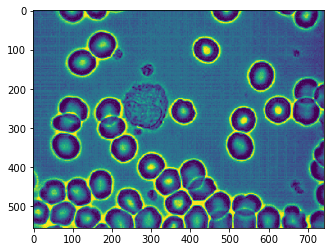

In [92]:
img_source = cv2.imread('1.png')
img = cv2.cvtColor(img_source,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

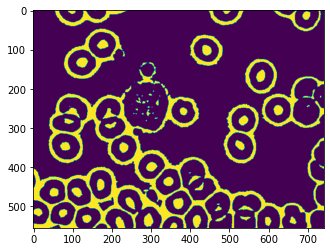

In [93]:
img = cv2.GaussianBlur(img,(9,9),0)
ret3,res = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite('Binary.png',res)
plt.imshow(res)

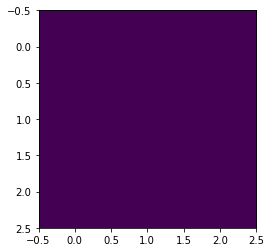

In [96]:
# Очищаем дальше от шума (некоторые клетки разрушились)
kernel = np.ones((3,3),np.uint8)
#elem=ring(30)
elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
#plt.imshow(elem)
#plt.imshow(kernel)

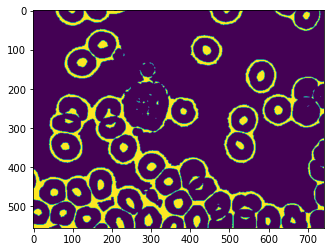

In [97]:
# Избавимся немного от шума
erode = cv2.erode(res, kernel,iterations=1)
cv2.imwrite('erode.png',res)
plt.imshow(erode)

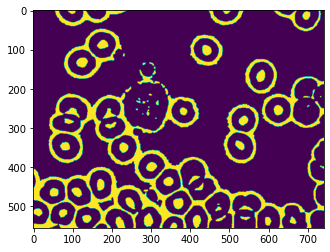

In [100]:
dilate = cv2.dilate(erode, kernel, kernel,iterations=1)
cv2.imwrite('dilate.png',res)
plt.imshow(dilate)

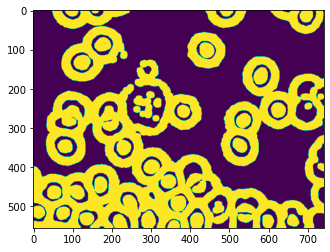

In [107]:
# Образуем маску
mask = cv2.dilate(dilate, elem, iterations=1)
cv2.imwrite('Mask.png', mask)
plt.imshow(mask)

True

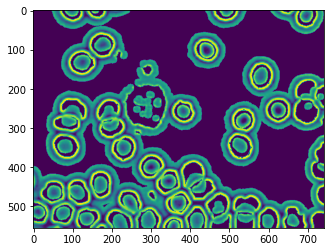

In [108]:
# Перемножаем исходное полутоновое изображение на маску
mult = img * mask
plt.imshow(mult)
cv2.imwrite('MaskResult.png', mult)

In [109]:
circles = cv2.HoughCircles(mult,cv2.HOUGH_GRADIENT,1,51,
                            param1=150,param2=13,minRadius=22,maxRadius=40)
circles.shape
#circles.size

(1, 56, 3)

In [110]:
cimg = img.copy()
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

(56, 3)

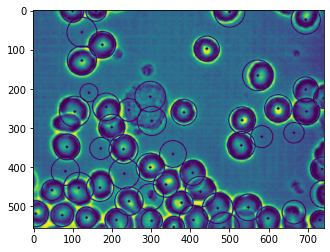

In [111]:
cv2.imwrite('ResultHougfWithMask.png',cimg)
plt.imshow(cimg)
# Найдено клеток:
circles[0].shape